<a href="https://colab.research.google.com/github/Shaik-pardi-11/-Support-Vector-Machines-SVM-/blob/main/Support_Vector_Machines_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVM)

# 1.Load and prepare a dataset for binary classification.

In [29]:
import pandas as pd

df = pd.read_csv("breast-cancer.csv")
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [30]:
df.drop(columns=["Unnamed: 0"], errors='ignore', inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)
df = pd.get_dummies(df, drop_first=True)

In [31]:
if 'diagnosis_M' in df.columns:
    df['diagnosis_M'] = df['diagnosis_M'].astype(int)

    X = df.drop('diagnosis_M', axis=1)
    y = df['diagnosis_M']
else:
    raise KeyError("The column 'diagnosis_M' was not found in the dataset after one-hot encoding.")

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# 2.Train an SVM with linear and RBF kernel.

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Linear kernel -------
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("SVM with Linear Kernel")
print(classification_report(y_test, y_pred_linear))

# RBF kernel----------
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("SVM with RBF Kernel")
print(classification_report(y_test, y_pred_rbf))

SVM with Linear Kernel
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

SVM with RBF Kernel
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#  3.Visualize decision boundary using 2D data.

In [35]:
from sklearn.decomposition import PCA

# Reduce scaled features to 2D
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

In [36]:
# Linear SVM on 2D data
svm_linear_2D = SVC(kernel='linear', random_state=42)
svm_linear_2D.fit(X_train_2D, y_train)

# RBF SVM on 2D data
svm_rbf_2D = SVC(kernel='rbf', random_state=42)
svm_rbf_2D.fit(X_train_2D, y_train)

SVC(random_state=42)

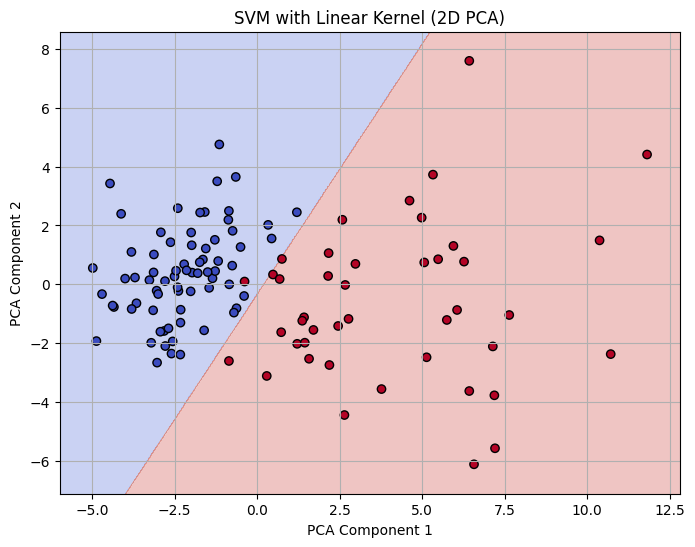

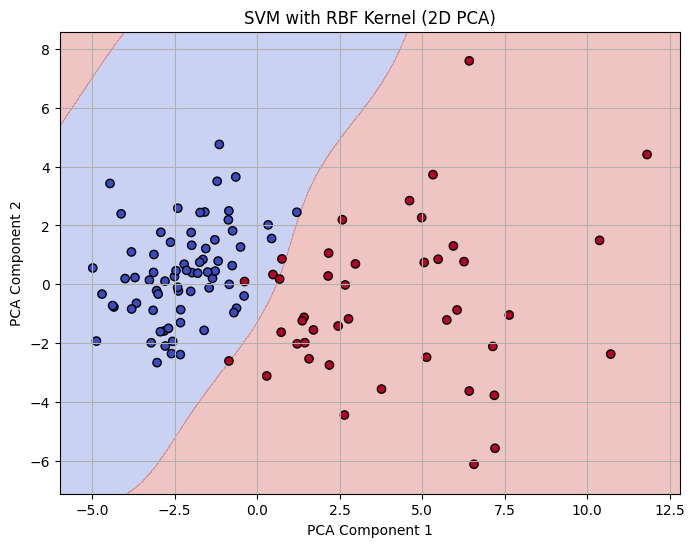

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()

# Plot for linear SVM
plot_decision_boundary(svm_linear_2D, X_test_2D, y_test, "SVM with Linear Kernel (2D PCA)")

# Plot for RBF SVM
plot_decision_boundary(svm_rbf_2D, X_test_2D, y_test, "SVM with RBF Kernel (2D PCA)")

# 4.Tune hyperparameters like C and gamma.

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

In [39]:
svm = SVC()
grid_rbf = GridSearchCV(svm, param_grid_rbf, cv=5, scoring='accuracy', verbose=1)
grid_rbf.fit(X_train, y_train)

print("🔧 Best Parameters (RBF):", grid_rbf.best_params_)
print("✅ Best Cross-Validation Accuracy:", grid_rbf.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
🔧 Best Parameters (RBF): {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
✅ Best Cross-Validation Accuracy: 0.9736263736263737


In [40]:
from sklearn.metrics import classification_report
best_rbf_model = grid_rbf.best_estimator_
y_pred_rbf_tuned = best_rbf_model.predict(X_test)

print("📊 Classification Report (Tuned RBF SVM):")
print(classification_report(y_test, y_pred_rbf_tuned))

📊 Classification Report (Tuned RBF SVM):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# 5.Use cross-validation to evaluate performance.

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np


svm_rbf = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42)
scores = cross_val_score(svm_rbf, X_scaled, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Cross-Validation Accuracy Scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
Mean Accuracy: 0.9789318428815401
Standard Deviation: 0.006990390328940835


In [42]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(
    svm_rbf,
    X_scaled,
    y,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=True
)

for metric in ['accuracy', 'precision', 'recall', 'f1']:
    print(f"🔹 {metric.capitalize()} (mean ± std): {cv_results['test_' + metric].mean():.3f} ± {cv_results['test_' + metric].std():.3f}")

🔹 Accuracy (mean ± std): 0.979 ± 0.007
🔹 Precision (mean ± std): 0.986 ± 0.018
🔹 Recall (mean ± std): 0.958 ± 0.028
🔹 F1 (mean ± std): 0.971 ± 0.010
